In [1]:
import numpy as np
import pandas as pd
import nltk
import itertools
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('job_skills.csv')
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [3]:
data = data.rename(columns = {'Minimum Qualifications':'Minimum', 'Preferred Qualifications':'Preferred'})
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum,Preferred
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
data = data.dropna(how='any',axis='rows')

In [5]:
minimum = list(data['Minimum'])
minimum = [nltk.word_tokenize(sent) for sent in minimum]
minimum = list(itertools.chain.from_iterable(minimum))
minimum[:5]

['BA/BS', 'degree', 'or', 'equivalent', 'practical']

In [6]:
for i in range(len(minimum)):
    if '/' in minimum[i]:
        minimum[i] = minimum[i].split('/')
minimum[:5]

[['BA', 'BS'], 'degree', 'or', 'equivalent', 'practical']

In [7]:
bow = []
for item in minimum:
    if type(item) == str:
        bow.append(item)
    elif type(item) == list:
        for i in range(len(item)):
            bow.append(item[i])
bow[:5]

['BA', 'BS', 'degree', 'or', 'equivalent']

In [8]:
pt = re.compile(r'(?i)\b(html|css|shell|viml|CoffeeScript|TeX|Haskell|Pascal|F\#|python|r|matlab|java|go|javascript|c|c\++|c\#|sas|php|ruby|scala|swift|objective-c|assembly|perl|delphi|scrtch|sql|visual basic)\b')
languages = [word for word in bow if pt.match(word)]
languages[:5]

['R', 'SAS', 'Python', 'Java', 'Javascript']

In [9]:
languages = [i.lower() for i in languages]

In [10]:
freq = nltk.FreqDist(languages)
freq

FreqDist({'assembly': 1,
          'c': 31,
          'c++': 53,
          'c-level': 4,
          'css': 22,
          'c、c++': 1,
          'go': 26,
          'go-to-market': 5,
          'html': 36,
          'java': 76,
          'javascript': 77,
          'matlab': 20,
          'objective-c': 3,
          'perl': 6,
          'php': 7,
          'python': 97,
          'r': 37,
          'ruby': 14,
          'sas': 18,
          'shell': 5,
          'sql': 73,
          'sql-based': 2})

In [11]:
del freq['go-to-market']
freq['sql'] += freq['sql-based']
del freq['sql-based']
freq['c'] += freq['c、c++']
freq['c++'] += freq['c、c++']
del freq['c、c++']
freq

FreqDist({'assembly': 1,
          'c': 32,
          'c++': 54,
          'c-level': 4,
          'css': 22,
          'go': 26,
          'html': 36,
          'java': 76,
          'javascript': 77,
          'matlab': 20,
          'objective-c': 3,
          'perl': 6,
          'php': 7,
          'python': 97,
          'r': 37,
          'ruby': 14,
          'sas': 18,
          'shell': 5,
          'sql': 75})

In [12]:
sorted_freq = sorted(freq.items(), key=lambda x: x[1])

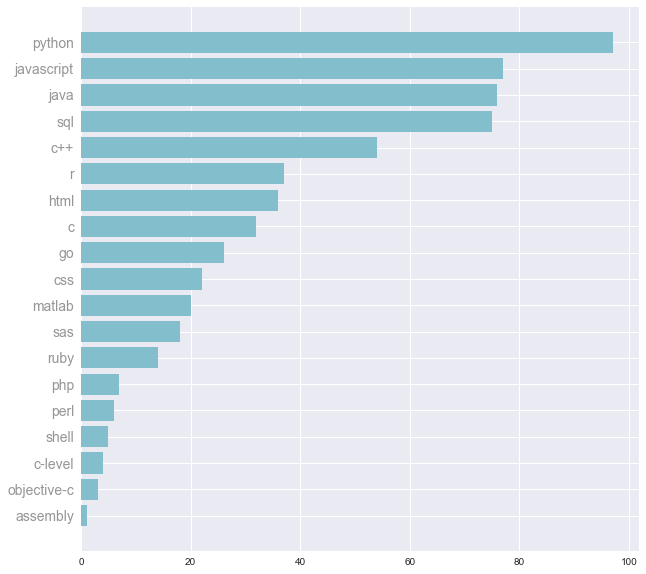

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
plt.barh(range(len(freq)), [i[1] for i in sorted_freq], align='center', color='#83becd')
plt.yticks(range(len(freq)), [i[0] for i in sorted_freq], fontsize=14, color='#959696')
plt.show()